In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin

# validation test for scalar convection + diffusion
# this validation test follows "H K Versteeg and W Malalasekera, An Introduction to Computational Fluid Dynamics
# THE FINITE VOLUME METHOD, Second Edition, 2007" examples 5.1

# the temperature along the x-axis should develop as:
def yFunc(x, case):
    if case == 1:
        return (2.7183-np.exp(x))/1.7183
    else:
        return 1+(1-np.exp(25*x))/(7.2e10)

case = 2   # 1,2,3

# geometric parameters
LenX = 1
LenY = 0.3
resolution = 20 if case == 3 else 5

#velocity in x direction: [ m/s ]
velX = 0.1 if case == 1 else 2.5

# thermal conductivity [ W / (m K) ]
k = 0.1

# const temperature at left/right boundaries [K]
T_l = 1
T_r = 0

geom = Odin.createGeometry( 'rectangle', [LenX, LenY] )
mesh = Odin.createMesh( geom, res=resolution )

# example: incompressible flow but with temp-dep density, i.e. BoussinesqFlow
# mulitphase stokes flow
myFlowModels = [
    Odin.FlowModels.ScalarConvectionDiffusion(depVariableName='T', velocityFieldName='u', diffusionCoeffName='D')
    ]

sim1 = Odin.Simulation(myFlowModels, mesh, geom )

myFields = sim1.getFieldRegistry()
print(myFields)

myFields['D'] = k

# defining the velocity field:
# I name the field 'U' because that name was given to the flow model above
U = myFields['u']
#U.setInternalValue([velX, 0])
U.u = velX
U.v = 0

# changing boundary conditions
T = myFields['T']
T.setBoundaryCondition('top', 'zeroGradient')
T.setBoundaryCondition('bottom', 'zeroGradient')
T.setBoundaryCondition('left', T_l)
T.setBoundaryCondition('right', T_r)
T.setConstSource( 0.0 )

sim1.solve('T')

{'governor': <Fields.fieldGovernor object at 0x7f591348f3d0>, 'invCellDist': <Fields.vectorField object at 0x7f59103bf610>, 'T': <ScalarField.scalarField object at 0x7f5900082940>, 'u': <Fields.vectorField object at 0x7f5900082a00>, 'D': 0.0}


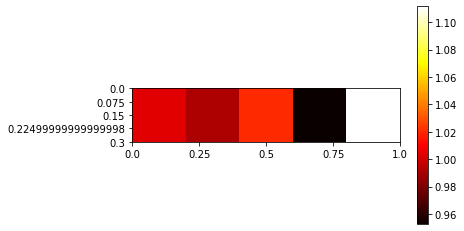

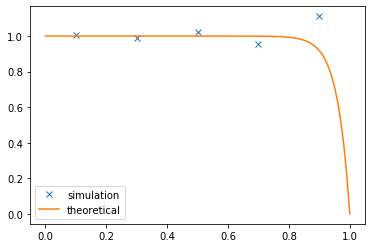

[1.00416667 0.99166667 1.02083333 0.95277778 1.11157407]


In [2]:
# post-processing:
import numpy as np
import matplotlib.pyplot as plt

sim1.display(T, mesh)

nbcellsX = sim1._mesh._cells_x
cellSpacing = sim1._mesh._uniformSpacing
L = geom._lenX

xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ySim = T._raw[0,:]

xTheo = np.linspace(0,LenX, 100)
yTheor = np.array([yFunc(x, case) for x in xTheo])

ax = plt.gca()
ax.plot(xSim, ySim, 'x', label='simulation')
ax.plot(xTheo, yTheor, label='theoretical')

plt.legend()
plt.show()

print(ySim)

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)